In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/Administrator/Downloads/diabetes_knn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.shape

(768, 9)

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


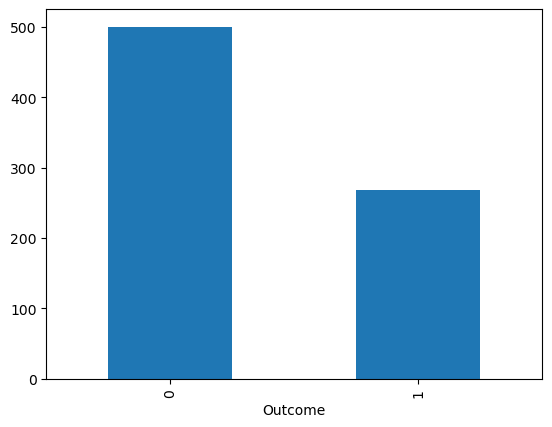

In [14]:
df['Outcome'].value_counts().plot(kind='bar')
df['Outcome']=df['Outcome'].astype('boolean')

<Axes: >

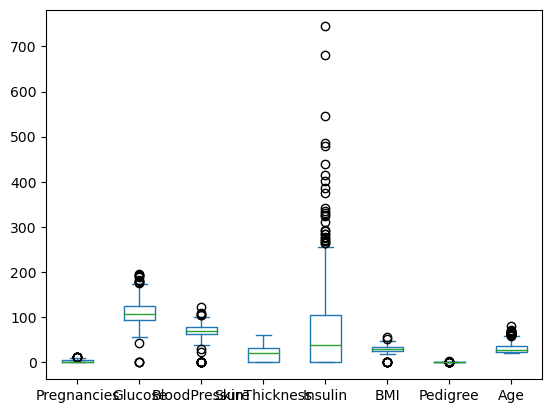

In [15]:
df[~df['Outcome']].plot(kind='box')

In [16]:
q1,q3=df['Insulin'].quantile([0.25,0.75])

In [17]:
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
indices=df[(df['Insulin']<lower_bound) | (df['Insulin']>upper_bound)].index

In [19]:
df=df.drop(indices,axis=0)

In [20]:
df.shape

(734, 9)

In [22]:
df.isnull().values.any()

False

In [24]:
df=df.drop_duplicates()

In [25]:
df.shape

(734, 9)

In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.145973,0.141183,-0.086904,-0.097015,0.022434,-0.036690,0.540206,0.223300
Glucose,0.145973,1.000000,0.157764,0.012172,0.219678,0.212414,0.113037,0.277492,0.464128
BloodPressure,0.141183,0.157764,1.000000,0.204248,0.104340,0.281522,0.039816,0.241986,0.064360
SkinThickness,-0.086904,0.012172,0.204248,1.000000,0.486500,0.379985,0.173589,-0.122144,0.054106
Insulin,-0.097015,0.219678,0.104340,0.486500,1.000000,0.199290,0.186657,-0.098004,0.088944
BMI,0.022434,0.212414,0.281522,0.379985,0.199290,1.000000,0.143219,0.047741,0.297225
Pedigree,-0.036690,0.113037,0.039816,0.173589,0.186657,0.143219,1.000000,0.042365,0.183005
Age,0.540206,0.277492,0.241986,-0.122144,-0.098004,0.047741,0.042365,1.000000,0.231023
Outcome,0.223300,0.464128,0.064360,0.054106,0.088944,0.297225,0.183005,0.231023,1.000000


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [29]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
scaler=StandardScaler()

In [36]:
x_train_fit=scaler.fit_transform(x_train)
x_test_fit=scaler.fit_transform(x_test)

In [38]:
knn=KNeighborsClassifier(n_neighbors=5)

In [39]:
knn.fit(x_train_fit,y_train)

KNeighborsClassifier()

In [40]:
y_pred=knn.predict(x_test_fit)

In [41]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7375565610859729

In [42]:
conf_matrix=confusion_matrix(y_test,y_pred)
conf_matrix

array([[124,  21],
       [ 37,  39]], dtype=int64)

In [43]:
class_report=classification_report(y_test,y_pred)
class_report

'              precision    recall  f1-score   support\n\n         0.0       0.77      0.86      0.81       145\n         1.0       0.65      0.51      0.57        76\n\n    accuracy                           0.74       221\n   macro avg       0.71      0.68      0.69       221\nweighted avg       0.73      0.74      0.73       221\n'